In [1]:
import numpy as np
import matplotlib.pyplot as plt

# P1

In [2]:
def f(x1, x2):
    return np.exp((x1 + x2) + x1 ** 2 + 5 * (x2 ** 2))

def grad_fx1(x1, x2):
    return (1 + (2 * x1)) * np.exp((x1 + x2) + x1 ** 2 + 5 * x2 ** 2)

def grad_fx2(x1, x2):
    return (1 + (10 * x2)) * np.exp((x1 + x2) + x1 ** 2 + 5 * x2 ** 2)

### p1-1


In [3]:
max_epochs, alpha = 100, 0.01
x1, x2 = np.random.uniform(-1, 1, 2)

In [4]:
def compute_min(max_epochs, alpha, x1, x2):
    fx_list = []
    for epoch in range(max_epochs):
        fx_list.append(f(x1, x2))
        x1_ = x1 - alpha * grad_fx1(x1, x2)
        x2_ = x2 - alpha * grad_fx2(x1, x2)
        x1, x2 = x1_, x2_
    return fx_list, x1, x2

/tmp/ipykernel_19312/3107104911.py:2: RuntimeWarning: overflow encountered in exp
  return np.exp((x1 + x2) + x1 ** 2 + 5 * (x2 ** 2))
/tmp/ipykernel_19312/3107104911.py:5: RuntimeWarning: overflow encountered in exp
  return (1 + (2 * x1)) * np.exp((x1 + x2) + x1 ** 2 + 5 * x2 ** 2)
/tmp/ipykernel_19312/3107104911.py:8: RuntimeWarning: overflow encountered in exp
  return (1 + (10 * x2)) * np.exp((x1 + x2) + x1 ** 2 + 5 * x2 ** 2)
/tmp/ipykernel_19312/2946331916.py:5: RuntimeWarning: invalid value encountered in scalar subtract
  x1_ = x1 - alpha * grad_fx1(x1, x2)
/tmp/ipykernel_19312/2946331916.py:6: RuntimeWarning: invalid value encountered in scalar subtract
  x2_ = x2 - alpha * grad_fx2(x1, x2)


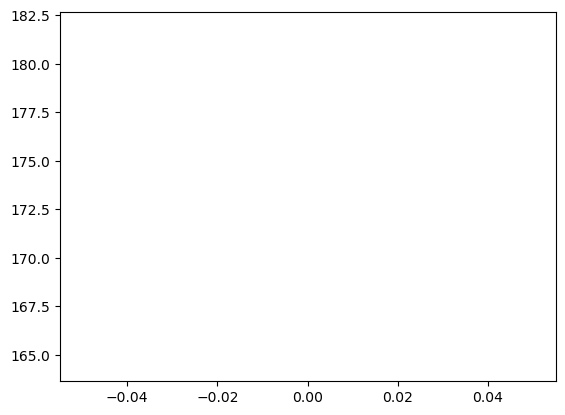

nan nan


In [5]:
fx_list, x1, x2 = compute_min(max_epochs, alpha, x1, x2)
plt.plot(fx_list)
plt.show()
print(x1, x2)

In [6]:
def grid_search_alpha(alpha_range):
    min_list = []
    for alpha in alpha_range:
        x1, x2 = np.random.uniform(-1, 1, 2)
        min_list.append(compute_min(max_epochs, alpha, x1, x2)[0])
    return min_list

/tmp/ipykernel_19312/3107104911.py:2: RuntimeWarning: overflow encountered in exp
  return np.exp((x1 + x2) + x1 ** 2 + 5 * (x2 ** 2))
/tmp/ipykernel_19312/3107104911.py:5: RuntimeWarning: overflow encountered in exp
  return (1 + (2 * x1)) * np.exp((x1 + x2) + x1 ** 2 + 5 * x2 ** 2)
/tmp/ipykernel_19312/3107104911.py:8: RuntimeWarning: overflow encountered in exp
  return (1 + (10 * x2)) * np.exp((x1 + x2) + x1 ** 2 + 5 * x2 ** 2)
/tmp/ipykernel_19312/2946331916.py:5: RuntimeWarning: invalid value encountered in scalar subtract
  x1_ = x1 - alpha * grad_fx1(x1, x2)
/tmp/ipykernel_19312/2946331916.py:6: RuntimeWarning: invalid value encountered in scalar subtract
  x2_ = x2 - alpha * grad_fx2(x1, x2)


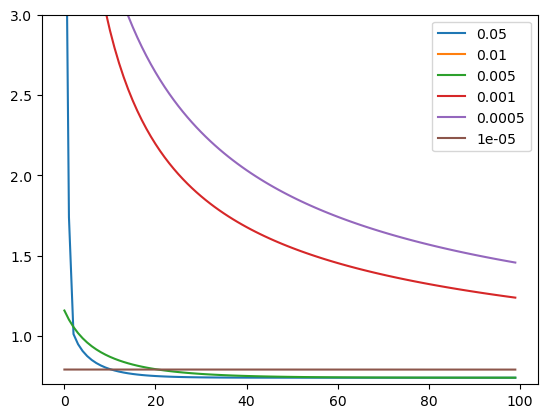

In [7]:
alpha_range = [0.05 ,0.01, 0.005, 0.001, 0.0005, 0.00001]
min_list = grid_search_alpha(alpha_range)
for i, list_ in enumerate(min_list):    
    plt.plot(list_, label=alpha_range[i])
plt.ylim(0.7, 3)
plt.legend()
plt.show()

In [8]:
def muitiple_runs(num_runs, alpha=0.01):
    min_list, x1_list, x2_list = [], [], []
    for _ in range(num_runs):
        x1, x2 = np.random.uniform(-1, 1, 2)
        loss_list, x1_, x2_ = compute_min(max_epochs, alpha, x1, x2)
        min_list.append(min(loss_list))
        x1_list.append(x1_)
        x2_list.append(x2_)
    return min_list, x1_list, x2_list
        

/tmp/ipykernel_19312/3107104911.py:2: RuntimeWarning: overflow encountered in exp
  return np.exp((x1 + x2) + x1 ** 2 + 5 * (x2 ** 2))
/tmp/ipykernel_19312/3107104911.py:5: RuntimeWarning: overflow encountered in exp
  return (1 + (2 * x1)) * np.exp((x1 + x2) + x1 ** 2 + 5 * x2 ** 2)
/tmp/ipykernel_19312/3107104911.py:8: RuntimeWarning: overflow encountered in exp
  return (1 + (10 * x2)) * np.exp((x1 + x2) + x1 ** 2 + 5 * x2 ** 2)
/tmp/ipykernel_19312/3107104911.py:2: RuntimeWarning: invalid value encountered in scalar add
  return np.exp((x1 + x2) + x1 ** 2 + 5 * (x2 ** 2))
/tmp/ipykernel_19312/3107104911.py:5: RuntimeWarning: invalid value encountered in scalar add
  return (1 + (2 * x1)) * np.exp((x1 + x2) + x1 ** 2 + 5 * x2 ** 2)
/tmp/ipykernel_19312/3107104911.py:8: RuntimeWarning: invalid value encountered in scalar add
  return (1 + (10 * x2)) * np.exp((x1 + x2) + x1 ** 2 + 5 * x2 ** 2)
/tmp/ipykernel_19312/2946331916.py:5: RuntimeWarning: invalid value encountered in scalar su

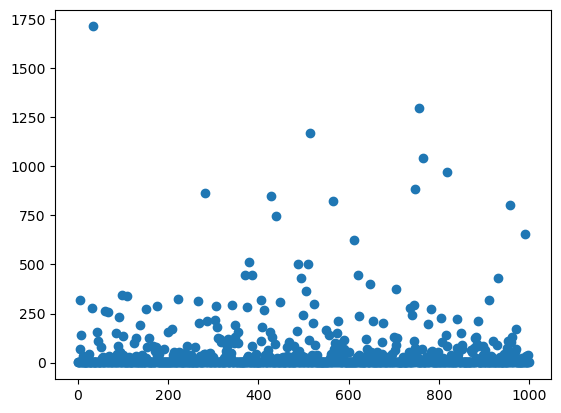

In [9]:
num_runs = 1000
min_list, x1_list, x2_list = muitiple_runs(num_runs)
plt.scatter(list(range(num_runs)), min_list)

In [11]:
min(min_list), np.mean([x1 for x1 in x1_list if not np.isnan(x1)]), np.mean([x2 for x2 in x2_list if not np.isnan(x2)])

(0.7408182837193155, -0.4392084216166984, -0.10000051043379997)

### o1-1

In [ ]:
f(-0.5, -0.1)

0.7408182206817179